In [90]:
import os
from google.cloud import bigquery
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

In [91]:
PROJECT_ID = "integrated-bit-312717"
DATASET_NAME = 'customs'
TABLE_NAME = "customs_test3"

table_id = "{project_id}.{dataset_name}.{table_name}".format(project_id=PROJECT_ID, dataset_name=DATASET_NAME, 
            table_name=TABLE_NAME)
table_id

'integrated-bit-312717.customs.customs_test3'

In [92]:
client = bigquery.Client(project=PROJECT_ID, location="US")

In [50]:
query_job = client.query(
    """
        SELECT hs_code, value, type FROM `integrated-bit-312717.customs.customs_test3` WHERE (`country`="THAILAND" AND `value`!=0)
    """
)
result = query_job.result()
print(result)
data_thai = [
    {
        'hs_code':row.hs_code,
        'value':row.value,
        'type':row.type
    } for row in result ]

In [57]:
df_thai = pd.DataFrame(data_thai)
df_thai

,hs_code,value,type
0,4010,19127,import
1,4012,29006335,import
2,3917,924756,import
3,4202,495354,import
4,2208,4703,import
...,...,...,...
81964,8535,438683,import
81965,8538,3135078,import
81966,9030,5457768,import
81967,8803,837378,import


In [58]:
df_thai_group = df_x.groupby(['hs_code','type']).agg('sum').sort_values(by='value',ascending=False).reset_index()
df_thai_group

,hs_code,type,value
0,8542,import,217811188486
1,7113,import,156303965446
2,8471,import,127543430314
3,7326,import,106777490265
4,8517,import,99305156853
...,...,...,...
1015,8002,import,71
1016,5302,import,40
1017,5908,import,36
1018,7107,import,15


In [59]:
df_hs_code = pd.read_csv('hs_code_split.csv', dtype={'hs_code':object})
df_hs_code

,hs_code,name
0,0101,Live animals
1,0102,Live animals
2,0103,Live animals
3,0104,Live animals
4,0105,Live animals
...,...,...
1249,9702,"Works of art, collectors’ pieces, and antiques"
1250,9703,"Works of art, collectors’ pieces, and antiques"
1251,9704,"Works of art, collectors’ pieces, and antiques"
1252,9705,"Works of art, collectors’ pieces, and antiques"


In [60]:
df_thai_group=df_thai_group.merge(df_hs_code, left_on='hs_code', right_on='hs_code').sort_values(by='value', ascending=False)
df_thai_group

,hs_code,type,value,name
0,8542,import,217811188486,Electrical machinery and equipment and parts t...
2,7113,import,156303965446,"Natural or cultured pearls, precious or semi-p..."
3,8471,import,127543430314,"Nuclear reactors, boilers, machinery and mecha..."
4,7326,import,106777490265,Articles of iron or steel
5,8517,import,99305156853,Electrical machinery and equipment and parts t...
...,...,...,...,...
1015,8002,import,71,Tin and articles thereof
1016,5302,import,40,Other vegetable textile fibres; paper yarn and...
1017,5908,import,36,"Impregnated, coated, covered or laminated text..."
1018,7107,import,15,"Natural or cultured pearls, precious or semi-p..."


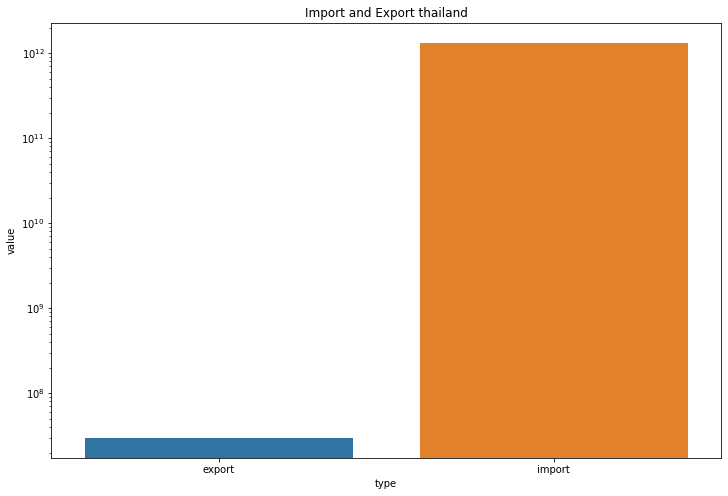

In [70]:
plt.figure(figsize=(12,8))
plt.title('Import and Export thailand')
g = sns.barplot(x='type', y='value', data=df_thai_group.groupby('type').agg('sum').reset_index())
g.set_yscale("log")

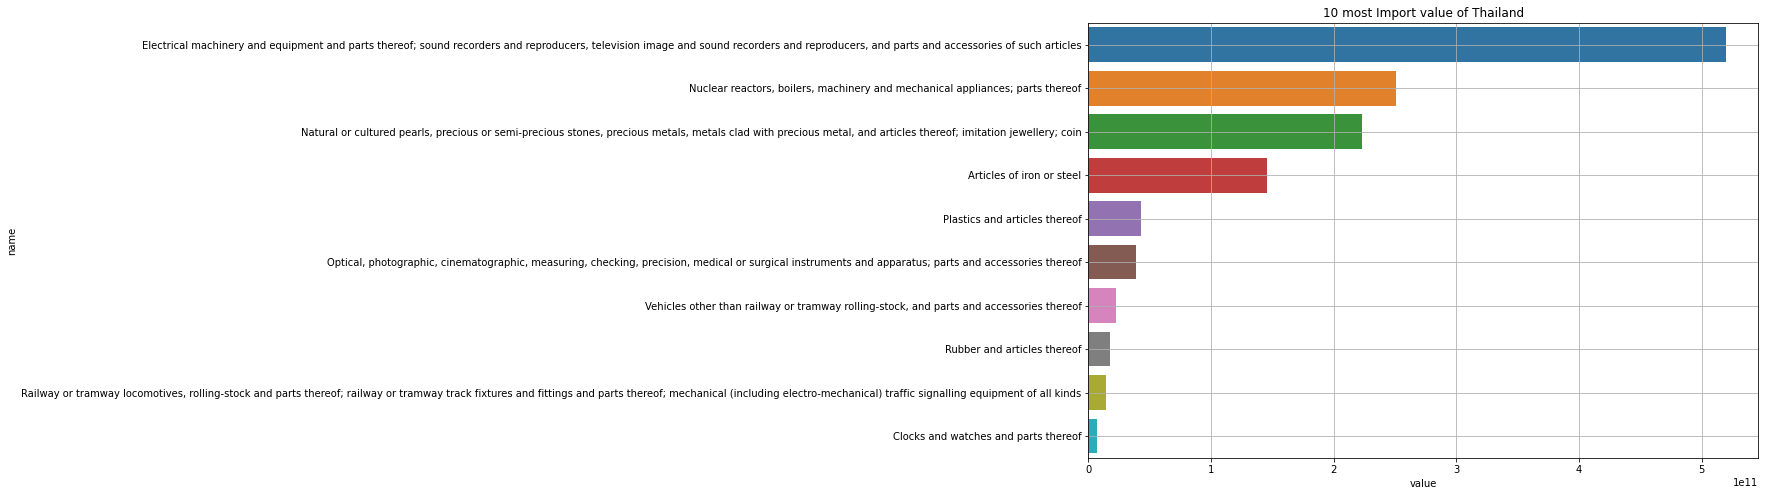

In [88]:
plt.figure(figsize=(12,8))
plt.title('10 most Import value of Thailand')
sns.barplot(y='name', x='value', 
                data=df_thai_group[df_thai_group['type']=='import']\
                        .groupby('name')\
                        .agg('sum')\
                        .reset_index().sort_values(by='value', ascending=False)[:10])
plt.grid()

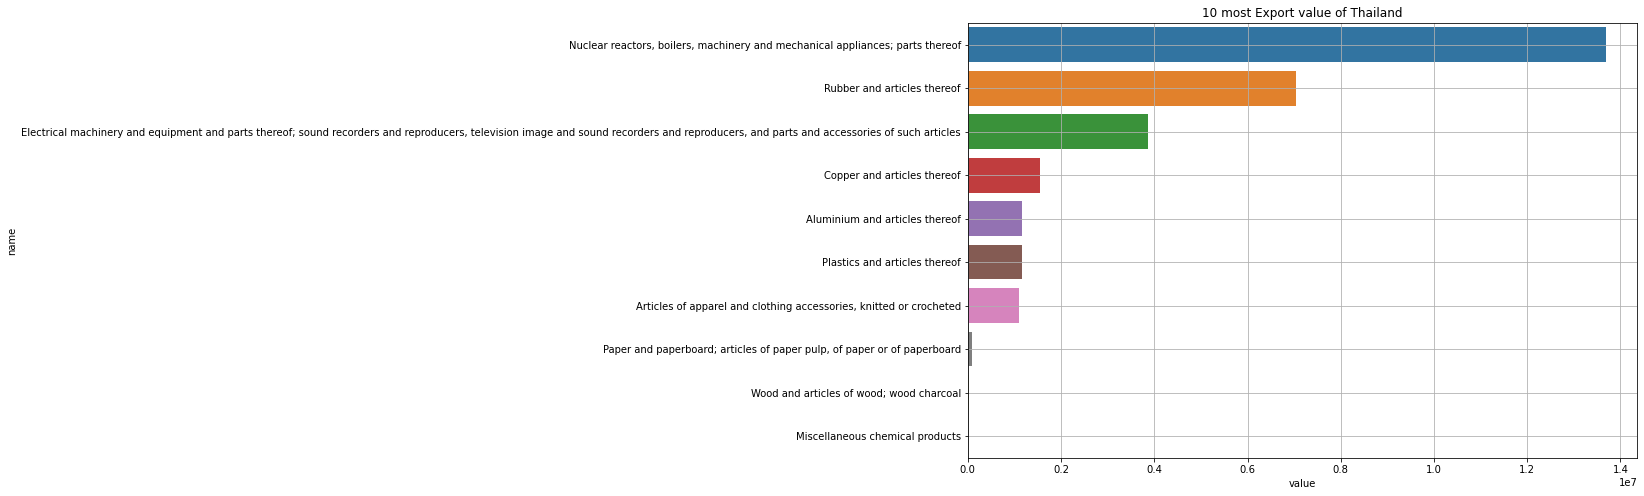

In [89]:
plt.figure(figsize=(12,8))
plt.title('10 most Export value of Thailand')
sns.barplot(y='name', x='value', 
                data=df_thai_group[df_thai_group['type']=='export']\
                        .groupby('name')\
                        .agg('sum')\
                        .reset_index().sort_values(by='value', ascending=False)[:10])
plt.grid()

In [99]:
df_thai_group[df_thai_group['type']=='import'][:10]

,hs_code,type,value,name
0,8542,import,217811188486,Electrical machinery and equipment and parts t...
2,7113,import,156303965446,"Natural or cultured pearls, precious or semi-p..."
3,8471,import,127543430314,"Nuclear reactors, boilers, machinery and mecha..."
4,7326,import,106777490265,Articles of iron or steel
5,8517,import,99305156853,Electrical machinery and equipment and parts t...
6,8473,import,86390619113,"Nuclear reactors, boilers, machinery and mecha..."
7,8543,import,56577005996,Electrical machinery and equipment and parts t...
8,7103,import,44717318243,"Natural or cultured pearls, precious or semi-p..."
9,8525,import,23991617297,Electrical machinery and equipment and parts t...
10,8537,import,22964966070,Electrical machinery and equipment and parts t...


In [104]:
query_job = client.query(
    """
        SELECT hs_code, value, type, year_month FROM `integrated-bit-312717.customs.customs_test3` 
        WHERE (`country`="THAILAND" AND `value`!=0 AND `hs_code`="8542")
    """
)
result = query_job.result()
print(result)
data = [
    {
        'hs_code':row.hs_code,
        'value':row.value,
        'type':row.type,
        'year_month':row.year_month
    } for row in result ]

In [106]:
df = pd.DataFrame(data)
df = df.sort_values(by='year_month')
df

,hs_code,value,type,year_month
33,8542,251480322,import,2001-01
21,8542,178914246,import,2001-02
24,8542,163095022,import,2001-03
1,8542,349826165,import,2001-04
14,8542,322581073,import,2001-05
...,...,...,...,...
213,8542,2123325954,import,2020-10
197,8542,1582686767,import,2020-11
227,8542,1718695994,import,2020-12
18,8542,2077444177,import,2021-01


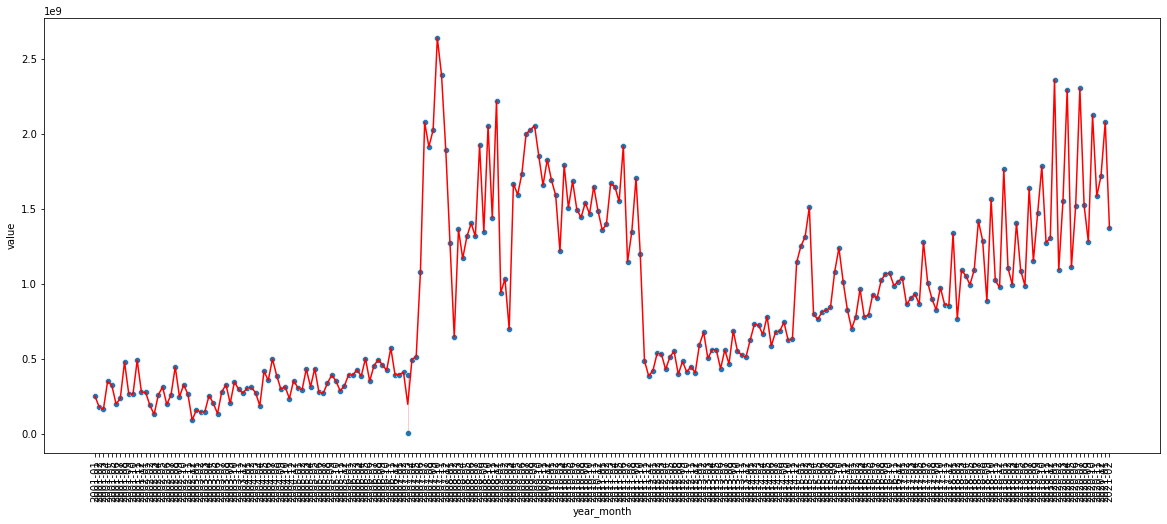

In [114]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='year_month', y='value',data=df)
sns.lineplot(x='year_month', y='value',data=df, color='r')
plt.xticks(rotation=90)
plt.show()